In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Exploring the data

In this workbook we'll have a look at the data and use a lot of matplotlib. We'll also look at descriptive statistics.

In [2]:
df = pd.read_parquet("./data/cleaned.parquet")

### Picking our dummy variables

This is just a bit of basic python trickery. You may want to skip it, but I just love how python solves these operations with dictionaries and iteratives.

In graphs below, we'll want to generate graphs for all actively used dummy variables. If a dummy variable is not used (it's always 0 or 1), we want to ignore it.

We can have pandas output the number of unique dummy values. If there are two unique values, we know these are 0 and 1, so the dummy variable is actively used.

In [3]:
# We need a list of dummies that are actually used
# A bit cheap, I know the dummy variables are the only ones with underscores
all_dummies = [x for x in list(df) if "_" in x]

dummies_nunique = {k:v for k, v in zip(all_dummies, [df[x].nunique() for x in all_dummies])}

dummies_nunique

{'case_under': 2,
 'case_frame': 2,
 'case_cable': 2,
 'case_gpio': 2,
 'top_solid': 2,
 'top_holed': 2,
 'top_intake': 2,
 'top_exhaust': 2,
 'heatsink_main': 1,
 'heatsink_sub': 1}

We can then use another list comprehension to pop the dictionary labels with more than one unique value.

In [4]:
dummies = [x for x in dummies_nunique.keys() if dummies_nunique[x] > 1]

dummies

['case_under',
 'case_frame',
 'case_cable',
 'case_gpio',
 'top_solid',
 'top_holed',
 'top_intake',
 'top_exhaust']

### Descriptive statistics

Most statistical software will give you a convenient function to output descriptive statistics. These include useful things like counts, means, and standard deviations.

In pandas this function is `.describe()`.

#### Normal describe()

First let's do the total population `.describe()`. This may get cut off in GitHub.

In [5]:
df.describe()

,usage,temp,stress,load,case_under,case_frame,case_cable,case_gpio,top_solid,top_holed,top_intake,top_exhaust,heatsink_main,heatsink_sub
count,61058.000000,61058.000000,61058.000000,0.0,61058.000000,61058.000000,61058.000000,61058.000000,61058.000000,61058.000000,61058.000000,61058.000000,61058.0,61058.0
mean,49.920901,66.462350,1.996479,NaN,0.940974,0.882047,0.352697,0.470356,0.235334,0.176537,0.176078,0.176308,1.0,1.0
std,35.157733,10.281545,1.413532,NaN,0.235675,0.322556,0.477813,0.499125,0.424211,0.381280,0.380890,0.381085,0.0,0.0
min,0.000000,40.780000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,25.000000,56.920000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
50%,50.000000,69.832000,2.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
75%,75.200000,75.212000,3.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
max,100.000000,83.820000,4.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


#### By-dummy describe()

It may be a lot more useful to get descriptive statisitcs for temperatures by dummy variables. This way you can focus on your main variable of interest, temperature. Look at the `mean` column below: you can see some interesting variations there!

The resulting dataframe below will have repeated data, and you can see this from looking at the sum of the counts for each dummy. The code works by taking the entire dataset and grouping it by each dummy variable one-by-one.

The use of `.set_index()` here I think is useful; otherwise, it's not as clear what the table is showing.

In [6]:
(
    pd.concat(
        [df.groupby(x)["temp"]
         .describe()
         .assign(dummy = x) for x in dummies])
    .reset_index()
    .rename({"index" : "value"}, axis=1)
    .set_index(["dummy", "value"], drop=True) # Prettier print by .set_index()
)

count       mean        std     min     25%     50%  \
dummy       value                                                          
case_under  0       3604.0  68.793469   4.694845  46.698  66.604  69.832   
            1      57454.0  66.316122  10.516500  40.780  56.920  69.832   
case_frame  0       7202.0  69.064666   4.347761  46.698  66.604  69.832   
            1      53856.0  66.114350  10.783898  40.780  55.844  69.832   
case_cable  0      39523.0  67.828851   9.060457  40.780  61.762  70.370   
            1      21535.0  63.954422  11.804455  41.856  53.154  60.148   
case_gpio   0      32339.0  65.079520  10.201975  40.780  55.844  68.756   
            1      28719.0  68.019484  10.147467  43.470  57.996  71.984   
top_solid   0      46689.0  63.739599   9.978668  40.780  54.768  64.990   
            1      14369.0  75.309348   4.826230  46.160  73.060  76.288   
top_holed   0      50279.0  64.918961  10.508809  40.780  55.844  66.604   
            1      10779.0  73.661538   4.553409  47.774  70.908  74.136   
top_intake  0      50307.0  69.791019   7.914077  44.546  64.452  71.984   
            1      10751.0  50.886553   3.581529  40.780  48.312  50.464   
top_exhaust 0      50293.0  68.298840  10.324435  40.780  63.376  71.984   
            1      10765.0  57.882453   3.494406  44.546  55.306  57.996   

                      75%     max  
dummy       value                  
case_under  0      71.984  77.364  
            1      75.212  83.820  
case_frame  0      71.984  79.516  
            1      75.212  83.820  
case_cable  0      74.674  83.282  
            1      75.750  83.820  
case_gpio   0      73.060  82.744  
            1      76.826  83.820  
top_solid   0      72.522  82.206  
            1      78.440  83.820  
top_holed   0      74.136  83.820  
            1      76.826  82.206  
top_intake  0      75.750  83.820  
            1      53.154  62.300  
top_exhaust 0      75.750  83.820  
            1      60.148  68.756

#### Things to pay attention to

Look at the counts above. You can see that some categories are not balanced. In the data I'm looking at, `case_cable` has nearly equal counts, but the other categories are pretty unequal.

The means are all higher for observations where a case component is present.

Look at how often the maximum value of `83.820` show up in each category. It's the maximum for each dummy except for `top_holed`, `top_intake` and `top_exhaust`. By elimination we can conclude that the maximum temperature was reached with a fully closed case.

### Plotting the raw data

It turns out that me might have a problem. Closed cases are able to build up heat and remain at higher temperatures. This may be a good description of what temperatures are like in day-to-day operation, but it's a poor data source for closed-case behaviour at lower temperatures. If we wanted to see how long it takes for a closed case to cool down, we wouldn't have a good idea with this data.

The script `04_minmax_test.py` and the notebook `05_time_series.ipynb` look at this.

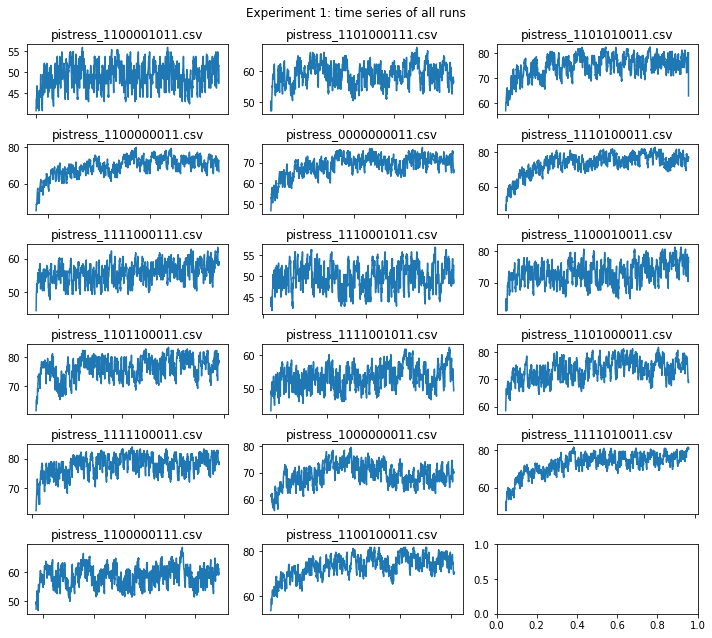

In [17]:
unique_filenames = df.filename.drop_duplicates()
n_filenames = len(unique_filenames)

fig, axs = plt.subplots(math.ceil(n_filenames/3),
                        3,
                        figsize=(10, math.ceil(n_filenames/2)))
for n, f in enumerate(unique_filenames):
    axs[n//3, n%3].plot(df.loc[df.filename == f].index, df.loc[df.filename == f].temp)
    axs[n//3, n%3].set_xticklabels([])
    axs[n//3, n%3].set_title(f)
fig.suptitle("Experiment 1: time series of all runs")
fig.tight_layout()
plt.savefig("./images/exp1_time_series.png")
plt.show()

### Plotting counts

The best way to get a handle on counts is the dependable bar plot.

Note that all dummies will have identical sums of on+off counts. All observations have each dummy as either on or off.

What we're concerned about are very imbalanced dummies. For example, it's very likely that the `case_under` and the `case_frame` are nearly always on. It's a good idea to think about these imbalanced classes because they may lead to improper conclusions. For example, the `case_under` is nearly always on, so we don't have a lot of data of what happens when it's not there (hard to attach a fan without a base!)

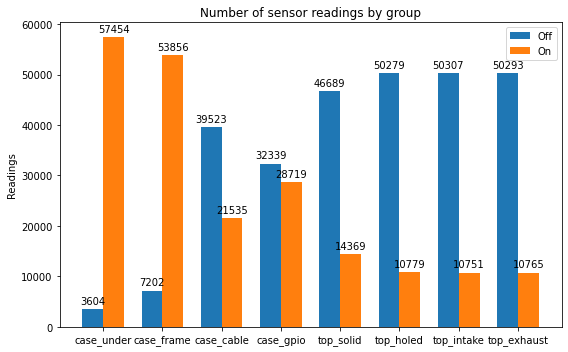

In [8]:
counts = (
    pd.concat([df.groupby(x)["temp"].describe().assign(var = x) for x in dummies])
    .reset_index()
    .rename({"index":"status"},
            axis=1)
    [["var", "status", "count"]]
)

x = np.arange(len(dummies))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (8, 5))
rects1 = ax.bar(x - width/2, counts.loc[counts.status == 0]["count"].astype(int), width, label="Off")
rects2 = ax.bar(x + width/2, counts.loc[counts.status == 1]["count"].astype(int), width, label="On")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Readings")
ax.set_title("Number of sensor readings by group")
ax.set_xticks(x)
ax.set_xticklabels(dummies)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("./images/exp1_dummy_counts.png")
plt.show()

### Correlation

A correlation matrix displays all pairings of variables and displays their correlation coefficient. A correlation coefficient is a measure of how much two things "move" together. For example, there would be a positive correlation between CPU temperature and CPU usage: CPUs get hot when they work.

In [9]:
# Print the correlation matrix
df.corr()

,usage,temp,stress,load,case_under,case_frame,case_cable,case_gpio,top_solid,top_holed,top_intake,top_exhaust,heatsink_main,heatsink_sub
usage,1.000000,0.211161,0.996410,NaN,0.009602,0.021269,0.015588,0.030559,0.002887,0.002843,0.005869,-0.001782,NaN,NaN
temp,0.211161,1.000000,0.209753,NaN,-0.056786,-0.092558,-0.180056,0.142723,0.477361,0.324209,-0.700335,-0.386083,NaN,NaN
stress,0.996410,0.209753,1.000000,NaN,0.009602,0.021360,0.014061,0.029972,0.001710,0.002703,0.005867,-0.000945,NaN,NaN
load,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_under,0.009602,-0.056786,0.009602,NaN,1.000000,0.684893,0.184876,0.236023,0.138944,0.115965,0.115782,0.115874,NaN,NaN
case_frame,0.021269,-0.092558,0.021360,NaN,0.684893,1.000000,0.269934,0.344612,0.202869,0.169319,0.169052,0.169185,NaN,NaN
case_cable,0.015588,-0.180056,0.014061,NaN,0.184876,0.269934,1.000000,0.290143,0.171632,-0.018675,0.303738,-0.019319,NaN,NaN
case_gpio,0.030559,0.142723,0.029972,NaN,0.236023,0.344612,0.290143,1.000000,0.032059,0.182196,-0.126709,0.181651,NaN,NaN
top_solid,0.002887,0.477361,0.001710,NaN,0.138944,0.202869,0.171632,0.032059,1.000000,-0.256863,-0.256458,-0.256661,NaN,NaN
top_holed,0.002843,0.324209,0.002703,NaN,0.115965,0.169319,-0.018675,0.182196,-0.256863,1.000000,-0.214046,-0.214215,NaN,NaN


In [10]:
df.corr()["temp"]

usage            0.211161
temp             1.000000
stress           0.209753
load                  NaN
case_under      -0.056786
case_frame      -0.092558
case_cable      -0.180056
case_gpio        0.142723
top_solid        0.477361
top_holed        0.324209
top_intake      -0.700335
top_exhaust     -0.386083
heatsink_main         NaN
heatsink_sub          NaN
Name: temp, dtype: float64

### Visualizing data

Scatter plots are usually pretty nice to see, but here temperature is our only really continuous variable. Usage tends to cluster around values since our tests operate by cores. So usage clusters around 25, 50, 75, and 100.

Nevertheless, you can see how various case components "split" along temperatures. Notice that the points are always the same between plots: only the color of the dots is changing.

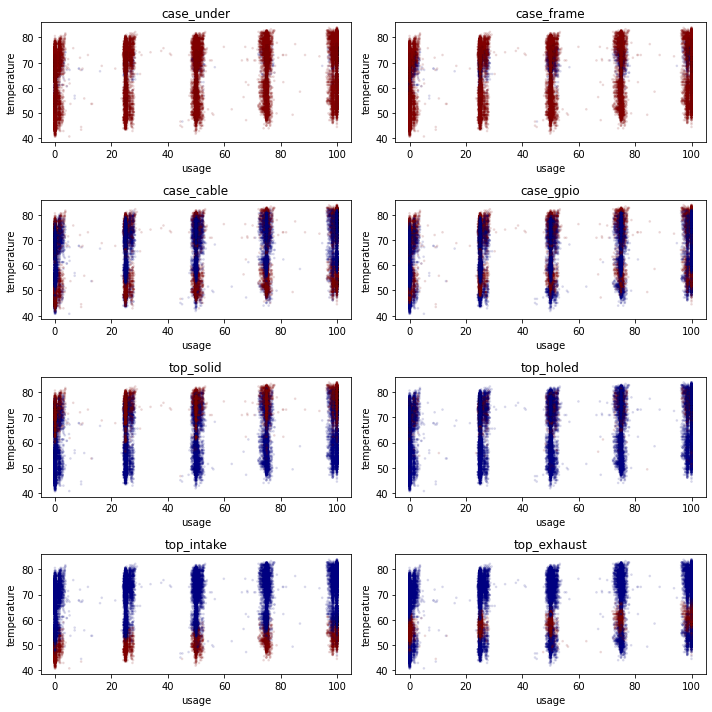

In [11]:
fig, axs = plt.subplots(math.ceil(len(dummies)/2), 2, figsize=(10, 10))
for n, x in enumerate(dummies):
    axs[n//2, n%2].scatter(df.usage, df.temp, s=3, c=df[x], cmap = "jet", alpha=0.1)
    axs[n//2, n%2].set_xlabel("usage")
    axs[n//2, n%2].set_ylabel("temperature")
    axs[n//2, n%2].set_title(x)
fig.tight_layout()
plt.show()

#### Boxplots for a clearer view

There is a much better way of essentially seeing the same information as the scatter plot above. (Later I'll show example of regression line plots, which are a bit nicer scatter plots.)

Box plots visually represent a few summary statistics relating to distribution. The orange line is the median and the box it's in is the 25-75 quantile range. Basically, the box shows you where half of the data resides. The whiskers are the maximum and minimum data points that are not considered outliers, so the whiskers show you the range of the majority of the data.

As you can see, having a solid top case pushes the distribution of temperatures up. Having a fan pushes temperatures down and squishes them together.

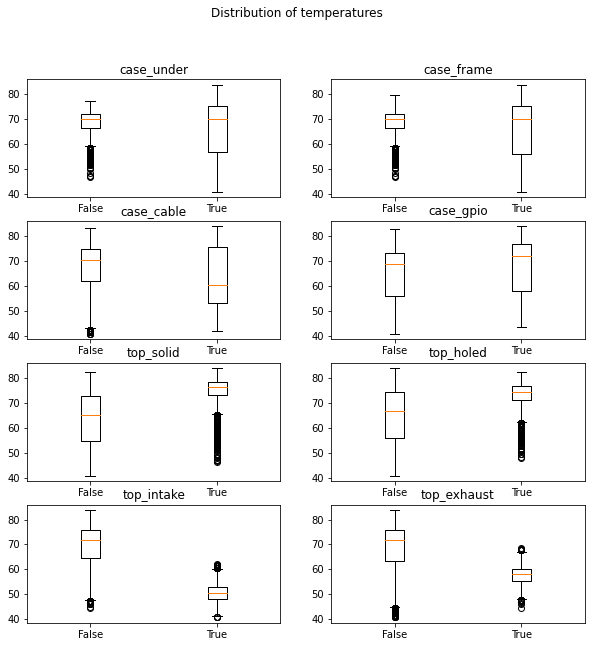

In [12]:
# Boxplots only accept 1D data, but can plot multiple series at a time
fig, axs = plt.subplots(math.ceil(len(dummies)/2), 2, figsize=(10, 10))
for n, x in enumerate(dummies):
    axs[n//2, n%2].boxplot([df.loc[df[x] == 0]["temp"], df.loc[df[x] == 1]["temp"]],
                          labels = ["False", "True"])
    axs[n//2, n%2].set_title(x)
fig.suptitle("Distribution of temperatures")
plt.show()

#### Violin plot

While boxplots are nice and informative, they're not self-evident. Readers must be familiar with boxplots in order to understand what the bars, lines, and circles mean.

Violin plots are much more obvious. The data's density is plotted vertically and lines indicate the range. Below you can see how temperatures are distributed.

Again, we see that the data isn't very useful due to the case dependencies.

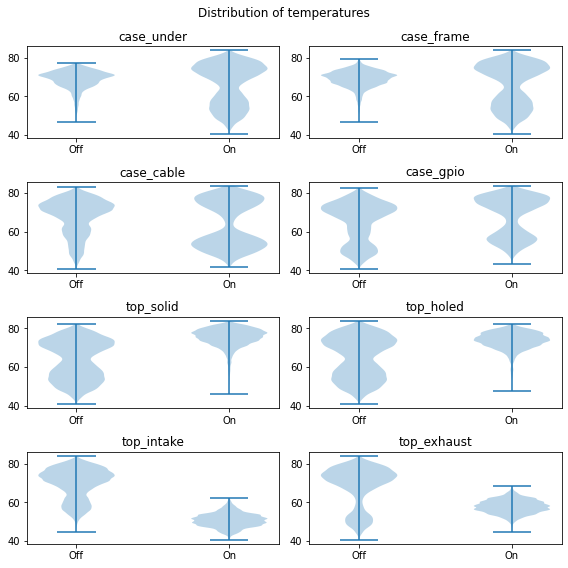

In [13]:
# Violin plots only accept 1D data, but can plot multiple series at a time
fig, axs = plt.subplots(math.ceil(len(dummies)/2), 2, figsize=(8, 8))
for n, x in enumerate(dummies):
    # Feed two series to .violinplot()
    axs[n//2, n%2].violinplot([df.loc[df[x] == 0]["temp"],
                               df.loc[df[x] == 1]["temp"]])
    # Rename xticks
    axs[n//2, n%2].set_xticks(np.arange(1, 3))
    axs[n//2, n%2].set_xticklabels(["Off", "On"])
    axs[n//2, n%2].set_title(x)
fig.suptitle("Distribution of temperatures")
fig.tight_layout()
plt.savefig("./images/exp1_temperature_dist.png")
plt.show()

It's useful to filter the data down to fewer records so that we can more clearly see the effects of the `case_under` and `case_frame`.

In [14]:
base_df = (df
           .loc[lambda df: df.case_cable == 0]
           .loc[lambda df: df.case_gpio == 0]
           .loc[lambda df: df.top_solid == 0]
           .loc[lambda df: df.top_holed == 0]
           .loc[lambda df: df.top_intake == 0]
           .loc[lambda df: df.top_exhaust == 0]
          )

# Print the number of distinct filenames
print(f"There are {base_df.filename.nunique()} filenames in this selection.")

There are 3 filenames in this selection.


Looking at the plots, we get the impression that these case parts may not have a huge impact on temperatures.

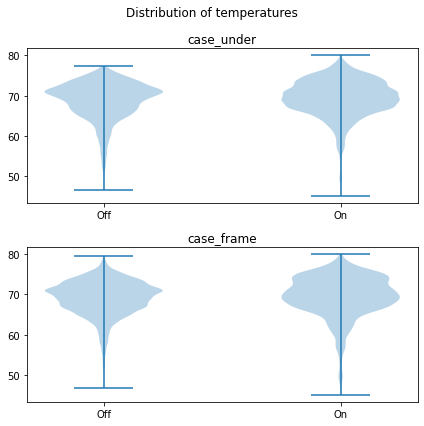

In [15]:
# Violin plots only accept 1D data, but can plot multiple series at a time
base_dummies = ["case_under", "case_frame"]
fig, axs = plt.subplots(2, 1, figsize=(6, 6))
for n, x in enumerate(base_dummies):
    # Feed two series to .violinplot()
    axs[n].violinplot([base_df.loc[base_df[x] == 0]["temp"],
                               base_df.loc[base_df[x] == 1]["temp"]])
    # Rename xticks
    axs[n].set_xticks(np.arange(1, 3))
    axs[n].set_xticklabels(["Off", "On"])
    axs[n].set_title(x)
fig.suptitle("Distribution of temperatures")
fig.tight_layout()
plt.savefig("./images/exp1_isolated_temp_dist.png")
plt.show()

### Comparing case tops

Rather than comparing components one by one, we can pick a few interesting configurations and plot them side-by-side. This way we can see how temperatures differ.

Below we can use the `np.polyfit()` function to add a line to better make sense of the scatter plot. This is linear regression. Given a cloud of points, the line will try to settle at the cloud's center; or it finds the line that is closest to all dots, the line that has the minimum distance to all dots.

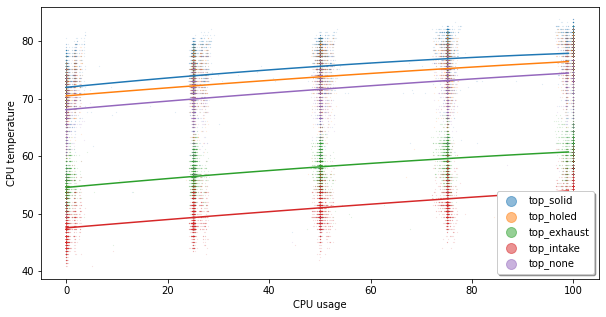

In [16]:
tops = ["top_solid", "top_holed", "top_exhaust", "top_intake", "top_none"]

plt.figure(figsize=(10,5))
for top in tops:
    df_copy = df.copy()
    df_copy = df_copy.loc[df_copy.case_under == 1]
    df_copy = df_copy.loc[df_copy.case_frame == 1]
    if top == "top_none":
        for t in tops:
            if t != "top_none":
                df_copy = df_copy.loc[df_copy[t] == 0]
    else:
        df_copy = df_copy.loc[df_copy[top] == 1]
    # Fitting a 2nd order polynomial curve to the data
    coef = np.polyfit(df_copy.usage, df_copy.temp, 2)
    poly1d_fn = np.poly1d(coef) 
    plt.scatter(df_copy.usage, df_copy.temp, s=0.01, cmap = "jet", alpha=0.5, label=top)
    plt.plot(np.arange(100), poly1d_fn(np.arange(100)))
    plt.xlabel("CPU usage")
    plt.ylabel("CPU temperature")
plt.legend(loc='best', shadow=True, fancybox=True, markerscale=100)
plt.show()